# STUDENT PERFORMANCES
## Machine Learning project
## Team: Amadou and Jamie

* Analysis of student performances
* Features: 33 
* Data: 649

There are 2 different csv files in the data folder. One (student-port.csv) being the data set of the students that took the portugese language course and another (student-mat.csv) of the students that are taking the math course. There are 382 students that are taking both courses. 

More information about the dataset is in the data folder, labeled student.txt

In [1]:
# Importing the libraries to be used:
import numpy as np
import pandas as pd
from sklearn import linear_model
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
import matplotlib.pyplot as plt 

In [2]:
df1 = pd.read_csv("data\student-por.csv",sep=";") #read file from different directory
df2 = pd.read_csv("data\student-mat.csv", sep = ";")
print(df1)
#df1.to_csv("port.csv") # made in to a csv after being made in to a table - easier to read compared to original excel file


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health 

In [3]:
#Splitting the data accordingly
X = df1.iloc[:, :30]
y = 0.3 * df1.iloc[:, 30] + 0.3 * df1.iloc[:, 31] + 0.4 * df1.iloc[:, 32]
X.dropna()
y.dropna()

0       7.7
1      10.4
2      12.3
3      14.0
4      12.4
       ... 
644    10.3
645    15.4
646    10.5
647    10.0
648    10.7
Length: 649, dtype: float64

In [4]:
def fixingfile(X):
    switch = {0: ("GP", "MS"), 1: ("F", "M"), 3: ("U", "R"), 4: ("LE3", "GT3"), 5:("T", "A"), 15:("yes","no"), 16:("yes","no"),
             17:("yes","no"), 18:("yes","no"), 19:("yes","no"), 20:("yes","no"), 21:("yes","no"), 22:("yes","no")}
    for column in range(len(X.columns)):
        if column not in switch:
            continue
        for i in range(len(X.iloc[:,column])):
           #print(X.iloc[i, column] == "U",X.iloc[i, column], switch[column])
            if X.iloc[i,column] == switch[column][0]:
                #print(X.iloc[i, column], switch[column][0])
                X.iloc[i,column] = 1
            elif X.iloc[i, column] == switch[column][1]:
                X.iloc[i,column] = 0
    X.drop(["Mjob", "Fjob", "reason", "guardian"], axis = 1, inplace=True) #Remove the ones with more than 1 and 0 answers
    print(X.shape) #Checking the shape of the features
    
    return X

In [5]:
X_fixed = fixingfile(X)
#X_fixed.to_csv("portfix.csv") 
y = np.array(y) #changed to array to be easier to work with
X = np.array(X_fixed)


(649, 26)


In [6]:
X_scale = StandardScaler()
X = np.array(X_scale.fit_transform(X))

In [7]:
#Split the data into training and test set.  60% training and %40 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

## Linear Regression

## 1. Multiple Linear Regression

In [8]:
#reshaping ys to 2d
y_2d_train = y_train.reshape(y_train.shape[0], 1)
y_2d_test = y_test.reshape(y_test.shape[0],1)
print("Checking y_2d_train is in 2d:", y_2d_train.shape)
print("Checking y_2d_test is in 2d:", y_2d_test.shape)

Checking y_2d_train is in 2d: (389, 1)
Checking y_2d_test is in 2d: (260, 1)


In [9]:
n_train = y_2d_train.shape[0]
n_test = y_2d_test.shape[0]
print("Number training of rows:", n_train)
print("Number testing of rows:", n_test)

Number training of rows: 389
Number testing of rows: 260


In [10]:
# Adding the column of ones infront of x_train
ones_train = np.ones((n_train, 1))
X_1_train = np.hstack((ones_train, X_train))
print("X_1 shape:", X_1_train.shape)
print("X_1 with ones: ", X_1_train)

X_1 shape: (389, 27)
X_1 with ones:  [[ 1.         -1.36809408  0.83337685 ...  0.56067799 -0.3710422
  -0.78915946]
 [ 1.          0.73094388  0.83337685 ...  1.33986431 -0.3710422
   0.07343336]
 [ 1.          0.73094388  0.83337685 ... -0.99769466  1.01290255
  -0.35786305]
 ...
 [ 1.          0.73094388  0.83337685 ... -0.99769466  1.01290255
   0.07343336]
 [ 1.         -1.36809408  0.83337685 ... -0.99769466 -1.75498694
  -0.78915946]
 [ 1.         -1.36809408 -1.19993734 ... -0.21850834 -0.3710422
  -0.35786305]]


In [11]:
#Adding ones to testing set
ones_test = np.ones((n_test, 1))
X_1_test = np.hstack((ones_test, X_test))
print("X_1_test shape:", X_1_test.shape)
print("X_1_test with ones: ", X_1_test)

X_1_test shape: (260, 27)
X_1_test with ones:  [[ 1.          0.73094388  0.83337685 ... -0.21850834  1.01290255
  -0.78915946]
 [ 1.          0.73094388  0.83337685 ... -0.21850834  1.01290255
   1.79861901]
 [ 1.          0.73094388 -1.19993734 ... -0.99769466 -1.75498694
  -0.78915946]
 ...
 [ 1.          0.73094388 -1.19993734 ... -0.21850834  1.01290255
   0.50472977]
 [ 1.          0.73094388  0.83337685 ... -0.21850834 -1.06301457
   0.93602618]
 [ 1.          0.73094388 -1.19993734 ... -0.99769466  1.01290255
  -0.35786305]]


In [12]:
def compute_cost(X_1, y_2d, w, N):
    # Write your code in place of ellipsis. Cost can be calculated using a single line of code.
    # Remember w is a vector here.
    
    # TODO Q07 - Taken from hw
    # Write the cost function
    #ISSUES: X AND Y ARE NOW 2D ARRAYS
    cost = sum((y_2d- (np.dot(X_1, w)))**2)/(2*N)
    
    return cost[0]

In [13]:
def gradient_descent(X_1, y_2d, learning_rate, w, N, num_iters):
    # In place of ellipsis, write the updated value of w0 in temp0 and of w1 in temp1
    # TODO Q08
    # Finish the gradient descent function
    
    for i in range(num_iters):
        # derivative vector is given by : X_train.Transpose *  (( X_train * w)- y ) 
        slope = np.dot(X_1, w)
        der_vector = np.dot(X_1.T,(slope - y_2d))
        w = w - (learning_rate * (1/N)) * der_vector
       
        
        if(i % 100 == 0):
            # In place of ellipsis, call the cost you just coded above
            cost = compute_cost(X_1, y_2d, w, N)
            # You can uncomment print statements below to see how cost changes, 
            # but please make sure you put prints in comments before submission
            #print("Cost")
            #print(cost)
             
    return w 

In [14]:
w_testcase = np.zeros((X_1_train.shape[1],1))
g = gradient_descent(X_1_train, y_2d_train, 0.0049, w_testcase, n_train, 1000)
print(g)
print("g[0]: ", g[0][0])

[[ 1.13234624e+01]
 [ 5.76159828e-01]
 [ 6.75290492e-02]
 [ 9.61610408e-02]
 [ 1.59007006e-01]
 [ 3.58290017e-02]
 [ 1.16985750e-01]
 [-9.35030201e-02]
 [ 3.20845298e-01]
 [-2.06201794e-01]
 [ 1.94640093e-01]
 [-8.16869108e-01]
 [-3.03269279e-01]
 [-7.94833892e-02]
 [-5.15410349e-02]
 [ 1.25178092e-01]
 [-4.90972485e-02]
 [ 4.51469380e-01]
 [ 2.22035878e-01]
 [-1.90229161e-01]
 [ 7.07784793e-03]
 [-4.70073368e-02]
 [ 2.82760535e-02]
 [-3.96831529e-01]
 [-4.69316490e-02]
 [-2.38816221e-01]
 [-2.01936684e-01]]
g[0]:  11.323462427081987


In [15]:
def multiple_linear_reg_model_gda(X_1, y_2d, learning_rate, N, num_iters):
    #initialize the values of parameter vector w. It should be a column vector of zeros of dimension(d+1,1)
    # TODO 09 
    # Complete the function
    w = np.zeros((X_1.shape[1],1))
    
    # Calculate the initial cost by calling the function you coded above.
    initial_cost = compute_cost(X_1, y_2d, w, N)
    
    # Calculate the optimized value of gradients by calling the gradient_descent function coded above
    w = gradient_descent(X_1, y_2d, learning_rate, w, N, num_iters)
    
    # Calculate the cost with the optimized value of w0 and w1 by calling the cost function.
    final_cost = compute_cost(X_1, y_2d, w, N)

    return w, initial_cost, final_cost

In [16]:
def runningtest(X_run, y_run, num_rows):
    #Testing numbers on training set
    learning_rate = [0.01, 0.05, 0.001, 0.0049, 0.005, 0.0001, 0.0005, 0.0001]
    num_iters = [10,100, 1000, 10000]
    track = {}
    rsq_all = []
    w = []
    best_rsq = 0
    for nums in num_iters:
        print("*"* 50)
        print(nums)
        rsq_layer = []
        w_iteration =[]
        for alpha in learning_rate:
            results = multiple_linear_reg_model_gda(X_run, y_run, alpha, n_train, nums)
            print("Iter is:", nums, "Alpha is:", alpha)
            #print("w: ", results[0], "\ninitial cost: ", results[1], "\nfinal cost: ", results[2])
            print("\ninitial cost: ", results[1], "\nfinal cost: ", results[2])
            #print('-'*50)
            rss = 0
            tss = 0
            for i in range(num_rows):
                rss += (np.dot(results[0].T,X_run[i])-y_run[i])**2
            tss = np.sum((y_run-np.mean(y_run))**2 )# TSS 
            #print("RSS:",rss,"TSS:", tss)
            rsq = 1 - (rss/tss)
            print(rsq)
            rsq_layer.append(rsq[0]*100)
            if rsq > best_rsq:
                best_rsq = rsq
                track = {(nums,alpha): results, "RSS": rss ,"TSS":tss, "rsq": rsq}
            print('-'*50)
            w_iteration.append(results[0])

            
        rsq_all.append(rsq_layer)
        plt.title("Weight versus learning_rate for each iteration")
        plt.xlabel("learning_rate")
        plt.ylabel("The feature weights")
        plt.legend(X_fixed.columns, bbox_to_anchor=(1.3, 0), loc='lower right')
        w_iteration = np.array(w_iteration).reshape(len(learning_rate), X_run.shape[1])
        plt.plot(learning_rate, w_iteration)
        plt.show(block = False)
        #plt.xlim(0,10) #Limiting x to see the weight better
        w.append(w_iteration)
        print("*"* 50)
    return track, rsq_all, w

**************************************************
10
Iter is: 10 Alpha is: 0.01

initial cost:  70.60564267352186 
final cost:  57.29901560770408
[-12.86935567]
--------------------------------------------------
Iter is: 10 Alpha is: 0.05

initial cost:  70.60564267352186 
final cost:  25.80381522626189
[-5.24587154]
--------------------------------------------------
Iter is: 10 Alpha is: 0.001

initial cost:  70.60564267352186 
final cost:  69.13600263972477
[-15.73452502]
--------------------------------------------------
Iter is: 10 Alpha is: 0.0049

initial cost:  70.60564267352186 
final cost:  63.711261868632775
[-14.42145431]
--------------------------------------------------
Iter is: 10 Alpha is: 0.005

initial cost:  70.60564267352186 
final cost:  63.57834000995306
[-14.38928028]
--------------------------------------------------
Iter is: 10 Alpha is: 0.0001

initial cost:  70.60564267352186 
final cost:  70.45717807363154
[-16.05431851]
-------------------------------------

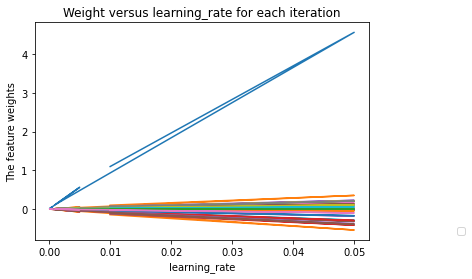

**************************************************
**************************************************
100
Iter is: 100 Alpha is: 0.01

initial cost:  70.60564267352186 
final cost:  11.50403017049849
[-1.78457639]
--------------------------------------------------
Iter is: 100 Alpha is: 0.05

initial cost:  70.60564267352186 
final cost:  2.6859801260418115
[0.34985247]
--------------------------------------------------
Iter is: 100 Alpha is: 0.001

initial cost:  70.60564267352186 
final cost:  57.36097412374509
[-12.88435287]
--------------------------------------------------
Iter is: 100 Alpha is: 0.0049

initial cost:  70.60564267352186 
final cost:  26.887023985167513
[-5.50806466]
--------------------------------------------------
Iter is: 100 Alpha is: 0.005

initial cost:  70.60564267352186 
final cost:  26.399608896033488
[-5.39008474]
--------------------------------------------------
Iter is: 100 Alpha is: 0.0001

initial cost:  70.60564267352186 
final cost:  69.13677933784

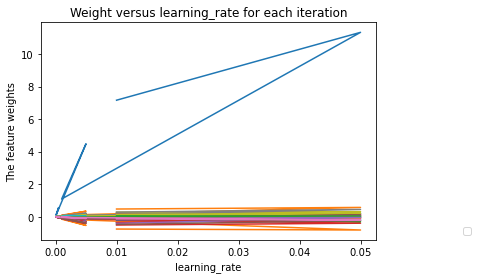

**************************************************
**************************************************
1000
Iter is: 1000 Alpha is: 0.01

initial cost:  70.60564267352186 
final cost:  2.6708004662947604
[0.35352674]
--------------------------------------------------
Iter is: 1000 Alpha is: 0.05

initial cost:  70.60564267352186 
final cost:  2.670626846837229
[0.35356876]
--------------------------------------------------
Iter is: 1000 Alpha is: 0.001

initial cost:  70.60564267352186 
final cost:  11.581213296385197
[-1.80325874]
--------------------------------------------------
Iter is: 1000 Alpha is: 0.0049

initial cost:  70.60564267352186 
final cost:  2.689686908910214
[0.34895523]
--------------------------------------------------
Iter is: 1000 Alpha is: 0.005

initial cost:  70.60564267352186 
final cost:  2.687485003673917
[0.34948821]
--------------------------------------------------
Iter is: 1000 Alpha is: 0.0001

initial cost:  70.60564267352186 
final cost:  57.367123196

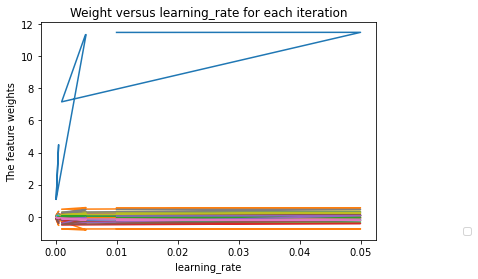

**************************************************
**************************************************
10000
Iter is: 10000 Alpha is: 0.01

initial cost:  70.60564267352186 
final cost:  2.6706268468372265
[0.35356876]
--------------------------------------------------
Iter is: 10000 Alpha is: 0.05

initial cost:  70.60564267352186 
final cost:  2.670626846837226
[0.35356876]
--------------------------------------------------
Iter is: 10000 Alpha is: 0.001

initial cost:  70.60564267352186 
final cost:  2.670802750059037
[0.35352618]
--------------------------------------------------
Iter is: 10000 Alpha is: 0.0049

initial cost:  70.60564267352186 
final cost:  2.6706268468372327
[0.35356876]
--------------------------------------------------
Iter is: 10000 Alpha is: 0.005

initial cost:  70.60564267352186 
final cost:  2.670626846837228
[0.35356876]
--------------------------------------------------
Iter is: 10000 Alpha is: 0.0001

initial cost:  70.60564267352186 
final cost:  11.588

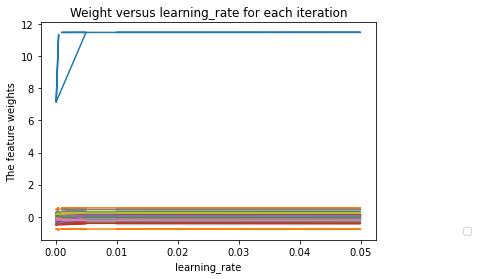

**************************************************


In [17]:
#Running test
track, rsq_all, w_train = runningtest(X_1_train, y_2d_train, n_train)

In [18]:
# The best rsq on training set based off gradient method
print("Best rsq based off the testing different iters and alpha:")
rsq_array = np.array(rsq_all)
w = 0
for i in track.items():
    if w == 0:
        w = i[1]
    print(i[0],": ",i[1] )

Best rsq based off the testing different iters and alpha:
(10000, 0.01) :  (array([[11.47362775],
       [ 0.56058736],
       [ 0.09796087],
       [ 0.07028253],
       [ 0.17709945],
       [ 0.07829602],
       [ 0.10222169],
       [-0.1201639 ],
       [ 0.340837  ],
       [-0.16577179],
       [ 0.28464535],
       [-0.74816859],
       [-0.32127609],
       [-0.06173153],
       [-0.02701408],
       [ 0.11483986],
       [-0.09246037],
       [ 0.46052837],
       [ 0.24624968],
       [-0.22378588],
       [ 0.06400374],
       [-0.0289685 ],
       [-0.03706529],
       [-0.41126264],
       [ 0.07304087],
       [-0.21652321],
       [-0.21495197]]), 70.60564267352186, 2.6706268468372265)
RSS :  [2077.74768684]
TSS :  3214.18205655527
rsq :  [0.35356876]


### Graphs of the iterations versus r-square values

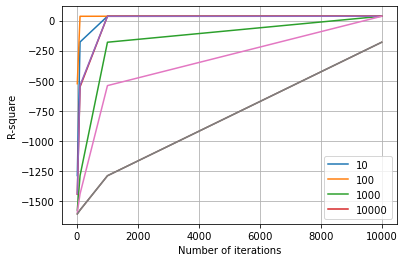

In [19]:
learning_rate = [0.01, 0.05, 0.001, 0.0049, 0.005, 0.0001, 0.0005, 0.0001]
num_iters = [10,100, 1000, 10000]
# This graph as you can see gets really huge negative numbers because the rsq is multipled by 100
plt.plot(num_iters, rsq_array)
plt.xlabel("Number of iterations")
plt.ylabel("R-square")
plt.legend(num_iters, loc='lower right')
plt.grid()
#plt.ylim(0,100)

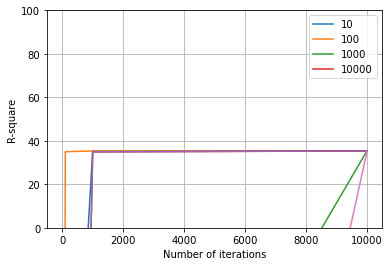

In [20]:
#In this instant, we limit the y-value to 0 to 100, which is the values we do care about
#To get a better look
plt.plot(num_iters, rsq_array)
plt.xlabel("Number of iterations")
plt.ylabel("R-square")
plt.ylim(0, 100)
plt.legend(num_iters, loc='upper right')
plt.grid()

### Graphs of alpha vs r^2 

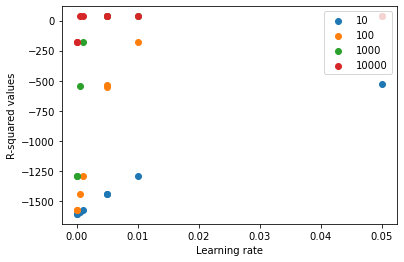

In [21]:
for i in range(len(num_iters)):
    plt.xlabel("Learning rate")
    plt.ylabel("R-squared values")
    plt.scatter(learning_rate, rsq_array[i])
    plt.legend(num_iters, loc='upper right')
    plt.grid()

# Using sklearn library to calculate

In [22]:
#Creating our regression
regr = linear_model.LinearRegression()
regr.fit(X_train,y_2d_train)

LinearRegression()

In [23]:
print('The intercept w0 = ', regr.intercept_)
print('The coefficients w[1..d]=', regr.coef_)
print('The rsq(r^2) = ', regr.score(X_train, y_2d_train))

The intercept w0 =  [11.47362775]
The coefficients w[1..d]= [[ 0.56058736  0.09796087  0.07028253  0.17709945  0.07829602  0.10222169
  -0.1201639   0.340837   -0.16577179  0.28464535 -0.74816859 -0.32127609
  -0.06173153 -0.02701408  0.11483986 -0.09246037  0.46052837  0.24624968
  -0.22378588  0.06400374 -0.0289685  -0.03706529 -0.41126264  0.07304087
  -0.21652321 -0.21495197]]
The rsq(r^2) =  0.3535687617315174


In [24]:
y_tr_pred = regr.predict(X_train)
RSS = np.sum((y_tr_pred-y_2d_train)**2)
TSS = np.sum((y_2d_train - np.mean(y_2d_train))**2)
print("RSS = {0:f}".format(RSS))
print("Ein = {0:f}".format(RSS/y_train.shape[0]))
print("RMSE = {0:f}".format(np.sqrt(RSS/y_train.shape[0])))
print("R^2 = {0:f}".format(1-RSS/TSS))

RSS = 2077.747687
Ein = 5.341254
RMSE = 2.311115
R^2 = 0.353569


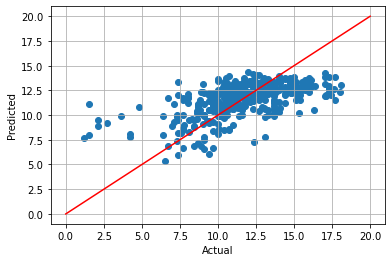

In [25]:
plt.scatter(y_2d_train,y_tr_pred)
#Set to 20, because maximum score for y is 20
plt.plot([0, 20],[0, 20],'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

# Validating over the testing set

In [26]:
y_test_pred = regr.predict(X_test)
y_tr_pred = regr.predict(X_train)
RSS = np.sum((y_test_pred-y_2d_test)**2)
TSS = np.sum((y_2d_test - np.mean(y_2d_test))**2)
print("RSS = {0:f}".format(RSS))
print("Ein = {0:f}".format(RSS/n_test))
print("RMSE = {0:f}".format(np.sqrt(RSS/n_test)))
print("R^2 = {0:f}".format(1-RSS/TSS))

RSS = 1423.073540
Ein = 5.473360
RMSE = 2.339521
R^2 = 0.315641


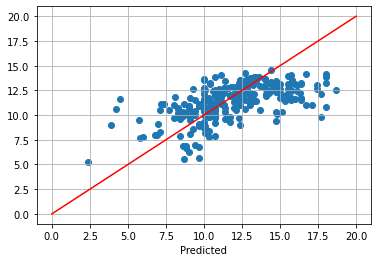

In [27]:
plt.scatter(y_2d_test,y_test_pred)
plt.plot([0,20],[0,20],'r')
plt.xlabel('Actual')
plt.xlabel('Predicted')
plt.grid()

# Attempting to use regularization in hopes of getting better rsq values
### Will be using the sklearn regularization library, below is the link to the library
### https://scikit-learn.org/stable/modules/linear_model.html

# ridge regression

In [28]:
def ridge(X_ridge, y_ridge, lamda):
    rsq = {}
    w_ridge = []
    for l in lamda:
        ridgereg = linear_model.Ridge(alpha = l)
        ridgereg.fit(X_ridge, y_ridge)
        #print('The intercept w0 = ', ridgereg.intercept_)
        #print('The coefficients w[1..d]=', ridgereg.coef_)
        #print('The rsq(r^2) = ', ridgereg.score(X_ridge, y_ridge))
        #print('-'* 70)
        rsq[l] = ridgereg.score(X_ridge, y_ridge)*100
        w_ridge.append(ridgereg.coef_)
    return rsq, w_ridge

In [29]:
lamda = [0.001, 0.01, 0.1, 0.5, 1, 10, 100]
rsq_train,w_ridge_train = ridge(X_train, y_2d_train, lamda) #Couldn't use x_1_train due to matrix size difference
rsq_test, w_ridge_test = ridge(X_test, y_2d_test, lamda) 
print("Ridge library on training set: ", rsq_train)
print("*"*60)
print("Ridge library on testing set: ", rsq_test)


Ridge library on training set:  {0.001: 35.35687617299076, 0.01: 35.35687615705492, 0.1: 35.356874564746334, 0.5: 35.35683610430914, 1: 35.35671659870654, 10: 35.3420836609884, 100: 34.50663625086724}
************************************************************
Ridge library on testing set:  {0.001: 47.375279051020236, 0.01: 47.375278988520286, 0.1: 47.37527274657821, 0.5: 47.375122314929065, 1: 47.37465650460938, 10: 47.32008777315203, 100: 44.95746147891495}


In [30]:
#Reshaping the weight list
w_ridge_train = np.array(w_ridge_train).reshape((len(lamda),26))
w_ridge_test = np.array(w_ridge_test).reshape((len(lamda),26))

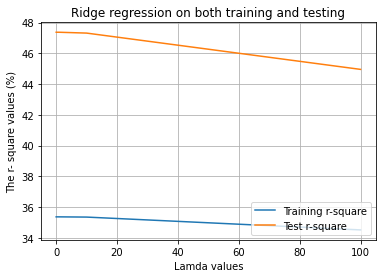

In [31]:
plt.title("Ridge regression on both training and testing")
plt.xlabel("Lamda values")
plt.ylabel("The r- square values (%)")
plt.plot(rsq_train.keys(), rsq_train.values())
plt.plot(rsq_test.keys(),rsq_test.values())
plt.grid()
plt.legend(['Training r-square', 'Test r-square'], loc='lower right')

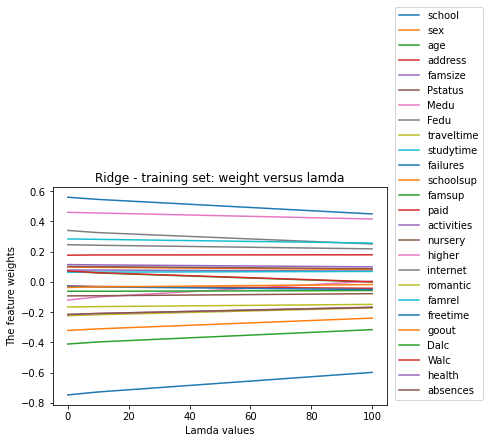

In [32]:
plt.title("Ridge - training set: weight versus lamda")
plt.xlabel("Lamda values")
plt.ylabel("The feature weights")
plt.plot(lamda, w_ridge_train)
plt.legend(X_fixed.columns, bbox_to_anchor=(1.3, 0), loc='lower right') 

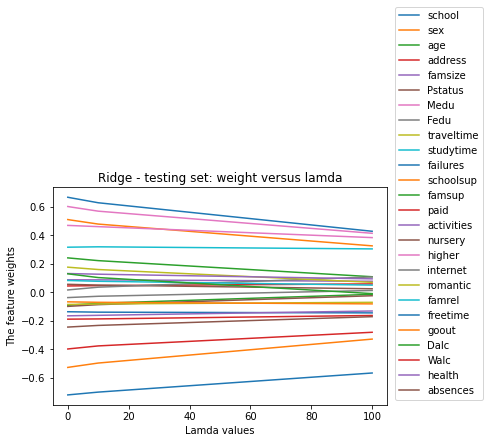

In [33]:
plt.title("Ridge - testing set: weight versus lamda")
plt.xlabel("Lamda values")
plt.ylabel("The feature weights")
plt.plot(lamda, w_ridge_test)
plt.legend(X_fixed.columns, bbox_to_anchor=(1.3, 0), loc='lower right') 

## Multiple regression with Lasso

In [34]:
def lasso(X_lasso, y_lasso):
    lamda = [0.001, 0.01, 0.1, 0.5, 1, 10, 100]
    rsq = {}
    w = []
    for l in lamda:
        lasso_reg = linear_model.Lasso(alpha = l)
        lasso_reg.fit(X_lasso, y_lasso)
        #print('The intercept w0 = ', regr.intercept_)
        #print('The coefficients w[1..d]=', regr.coef_)
        #print('The rsq(r^2) = ', lasso_reg.score(X_train, y_2d_train))
        #print('-'* 70)
        rsq[l] = lasso_reg.score(X_lasso, y_lasso)*100
        w.append(lasso_reg.coef_)
    return rsq, w

In [35]:
rsq_lasso_train, w_lasso_tr = lasso(X_train, y_2d_train) #Couldn't use x_1_train due to matrix size difference
rsq_lasso_test, w_lasso_test = lasso(X_test, y_2d_test) 
print("Lasso library on training set: ", rsq_lasso_train)
print("*"*60)
print("Lasso library on testing set: ", rsq_lasso_test)

Lasso library on training set:  {0.001: 35.356462107192776, 0.01: 35.315497243555384, 0.1: 33.501211832056086, 0.5: 19.958857407797115, 1: 2.3458282152007404, 10: 0.0, 100: 0.0}
************************************************************
Lasso library on testing set:  {0.001: 47.374833125060775, 0.01: 47.33076647910027, 0.1: 44.92436165871382, 0.5: 29.44536776245741, 1: 7.153345554620816, 10: 0.0, 100: 0.0}


In [36]:
#Reshaping the weight list
w_lasso_tr = np.array(w_lasso_tr).reshape((len(lamda),26))
w_lasso_test = np.array(w_lasso_test).reshape((len(lamda),26))

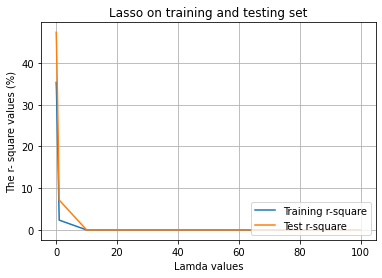

In [37]:
plt.title("Lasso on training and testing set")
plt.xlabel("Lamda values")
plt.ylabel("The r- square values (%)")
plt.plot(rsq_lasso_train.keys(), rsq_lasso_train.values())
plt.plot(rsq_lasso_test.keys(), rsq_lasso_test.values())
plt.legend(['Training r-square', 'Test r-square'], loc='lower right')
plt.grid()

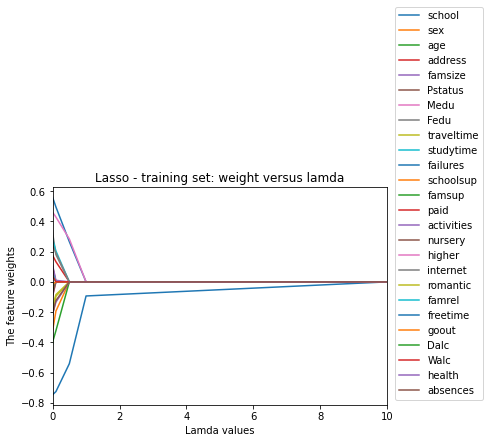

In [38]:
plt.title("Lasso - training set: weight versus lamda")
plt.xlabel("Lamda values")
plt.ylabel("The feature weights")
plt.plot(lamda, w_lasso_tr)
plt.xlim(0,10) #Limiting x to see the weight better
plt.legend(X_fixed.columns, bbox_to_anchor=(1.3, 0), loc='lower right') 

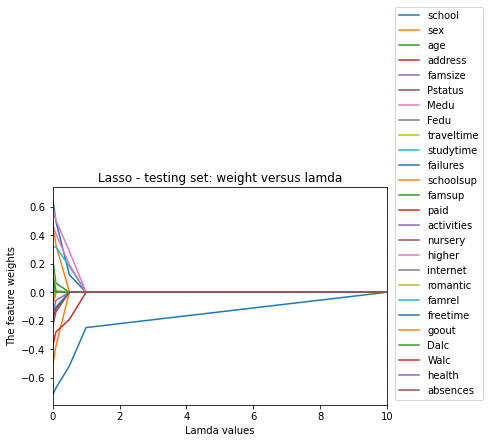

In [39]:
plt.title("Lasso - testing set: weight versus lamda")
plt.xlabel("Lamda values")
plt.ylabel("The feature weights")
plt.plot(lamda, w_lasso_test)
plt.xlim(0,10) #Limiting x to see the weight better
plt.legend(X_fixed.columns, bbox_to_anchor=(1.3, 0), loc='lower right') 